In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [2]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method) 
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [3]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.
    
    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    df = pd.read_csv(filepath, sep=';')
    
    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'month', 'poutcome', 'y']
    
    # Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    
    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education', 
               'housing', 'loan', 'default']
    X = df[features]
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)
print("SRN: PES2UG23CS394")

Data shape: (45211, 9)
SRN: PES2UG23CS394


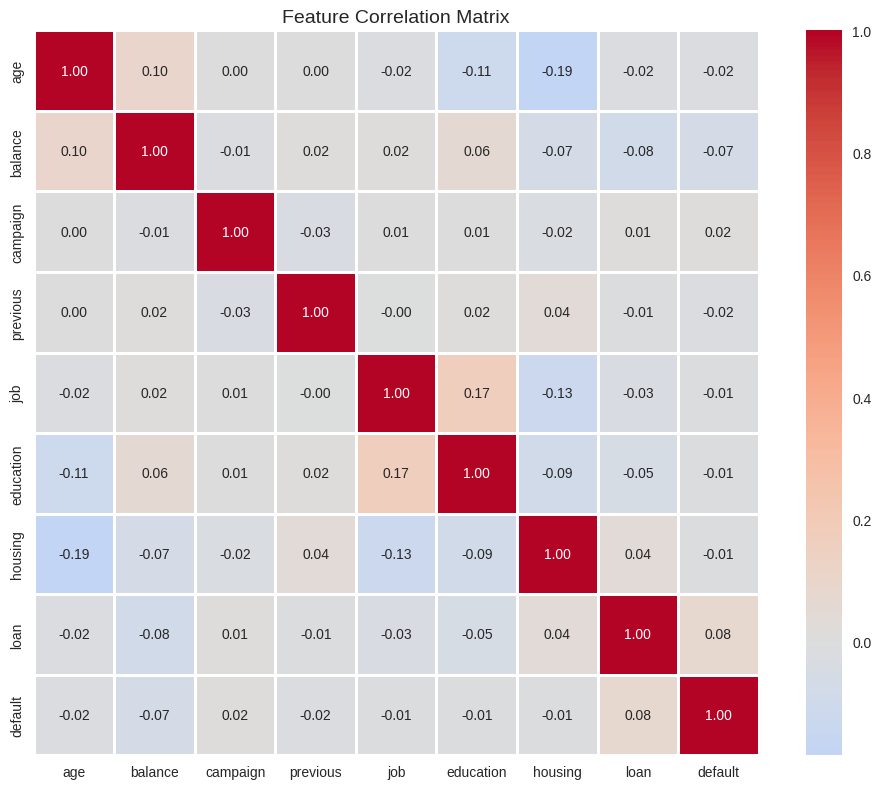

Correlation matrix shows relationships between features before dimensionality reduction


In [8]:
# Create Feature Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data[['age', 'balance', 'campaign', 'previous', 'job', 'education', 
                            'housing', 'loan', 'default']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1)
plt.title('Feature Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

print("Correlation matrix shows relationships between features before dimensionality reduction")

In [4]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        np.random.seed(self.random_state)
        # Randomly select n_clusters distinct indices
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        # Return the selected points as initial centroids
        return X[indices]

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        # Calculate distances from each point to each centroid
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i in range(self.n_clusters):
            # Calculate Euclidean distance from each point to centroid i
            distances[:, i] = np.linalg.norm(X - self.centroids[i], axis=1)
        # Assign each point to the nearest centroid
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            # Get all points assigned to cluster i
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                # Calculate mean of points in cluster
                centroids[i] = cluster_points.mean(axis=0)
            else:
                # If cluster is empty, keep the old centroid
                centroids[i] = self.centroids[i]
        return centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        # Initialize centroids
        self.centroids = self._initialize_centroids(X)
        
        for iteration in range(self.max_iters):
            # Assign clusters
            labels = self._assign_clusters(X)
            
            # Update centroids
            new_centroids = self._update_centroids(X, labels)
            
            # Check for convergence (if centroids don't change)
            if np.allclose(self.centroids, new_centroids, rtol=1e-6):
                break
            
            self.centroids = new_centroids
        
        # Store final labels
        self.labels = self._assign_clusters(X)
        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

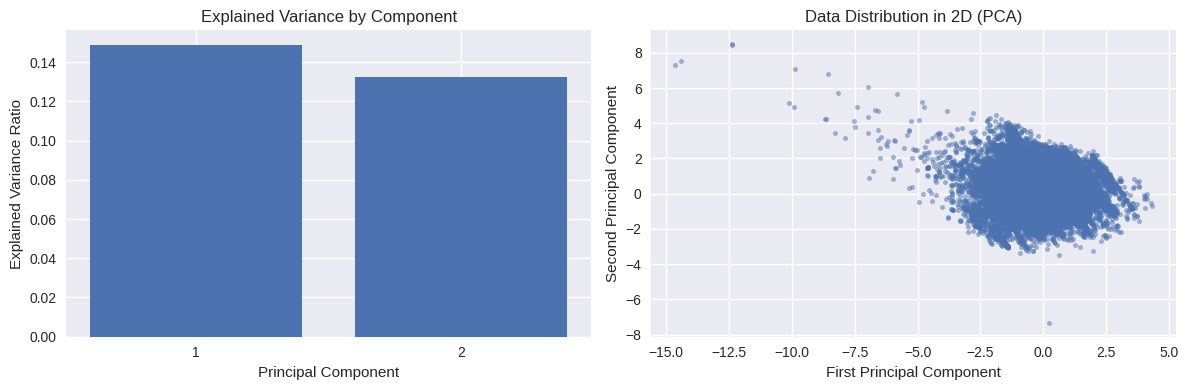

Explained variance ratio: [0.14878447 0.13240902]
Total variance explained: 0.2812
Shape after PCA: (45211, 2)


In [5]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.
    
    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # Create visualization
    plt.figure(figsize=(12, 4))
    
    # Plot explained variance
    plt.subplot(1, 2, 1)
    plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by Component')
    plt.xticks(range(1, n_components + 1))
    
    # Plot data in 2D
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=10)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('Data Distribution in 2D (PCA)')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.4f}")
    
    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

Calculating for k=1...
Calculating for k=2...
Calculating for k=2...
Calculating for k=3...
Calculating for k=3...
Calculating for k=4...
Calculating for k=4...
Calculating for k=5...
Calculating for k=5...
Calculating for k=6...
Calculating for k=6...
Calculating for k=7...
Calculating for k=7...
Calculating for k=8...
Calculating for k=8...
Calculating for k=9...
Calculating for k=9...
Calculating for k=10...
Calculating for k=10...


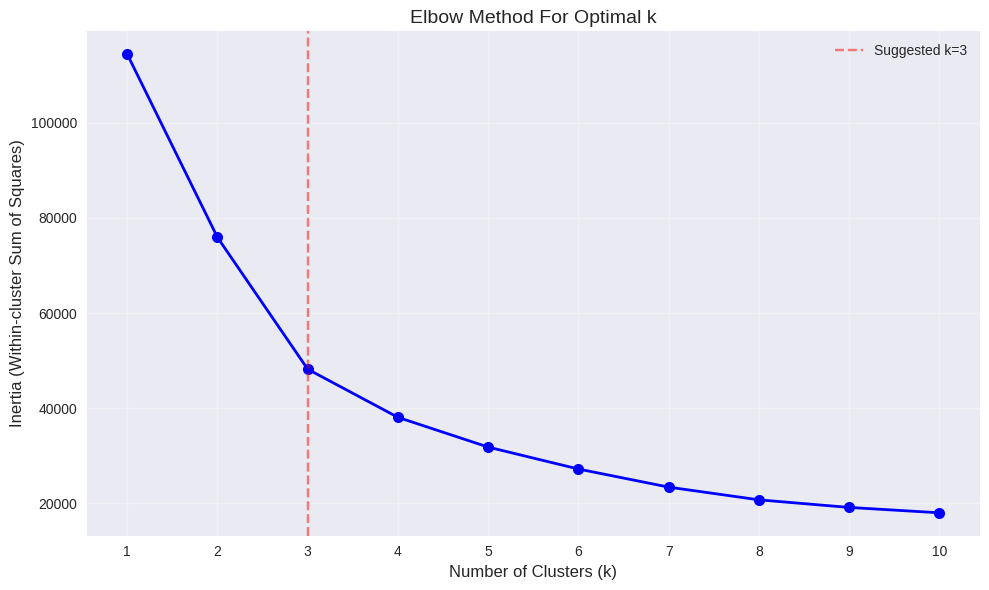

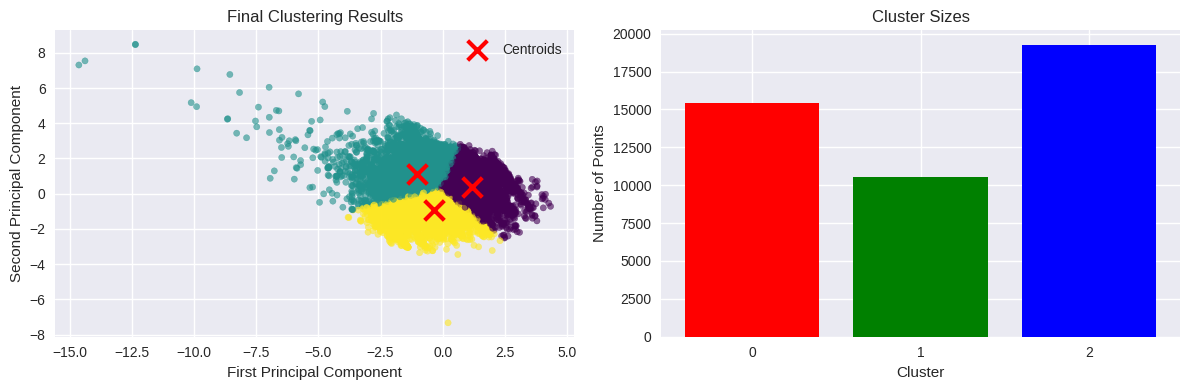


Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.39
Number of clusters: 3
Cluster sizes: [np.int64(15411), np.int64(10541), np.int64(19259)]


In [6]:
def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).
    
    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    # Your code here
    inertia = 0
    # Calculate distances between points and their assigned centroids
    for i in range(len(centroids)):
        # Get all points in cluster i
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            # Calculate squared distances from points to centroid
            distances = np.linalg.norm(cluster_points - centroids[i], axis=1) ** 2
            inertia += np.sum(distances)
    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.
    
    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    # Your code here
    inertias = []
    K = range(1, max_k + 1)
    
    # Calculate inertia for different k values
    for k in K:
        print(f"Calculating for k={k}...")
        kmeans = KMeansClustering(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia = calculate_inertia(X, kmeans.labels, kmeans.centroids)
        inertias.append(inertia)
    
    # Create elbow plot
    plt.figure(figsize=(10, 6))
    plt.plot(K, inertias, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Inertia (Within-cluster Sum of Squares)', fontsize=12)
    plt.title('Elbow Method For Optimal k', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.xticks(K)
    
    # Highlight the elbow point (k=3 or k=4 typically)
    plt.axvline(x=3, color='r', linestyle='--', alpha=0.5, label='Suggested k=3')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return inertias

# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)

# Apply final clustering
kmeans = KMeansClustering(n_clusters=3)  # Try different values based on elbow curve
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(12, 4))

# Plot clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis', alpha=0.6, s=20)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
            c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Final Clustering Results')
plt.legend()

# Plot evaluation metrics
plt.subplot(1, 2, 2)
cluster_sizes = [np.sum(kmeans.labels == i) for i in range(kmeans.n_clusters)]
plt.bar(range(kmeans.n_clusters), cluster_sizes, color=['red', 'green', 'blue'])
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.title('Cluster Sizes')
plt.xticks(range(kmeans.n_clusters))

plt.tight_layout()
plt.show()

# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Number of clusters: {kmeans.n_clusters}")
print(f"Cluster sizes: {cluster_sizes}")

Calculating Silhouette Scores...
Computing for k=2...
Computing for k=3...
Computing for k=4...
Computing for k=5...
Computing for k=6...
Computing for k=7...
Computing for k=8...
Computing for k=9...
Computing for k=10...


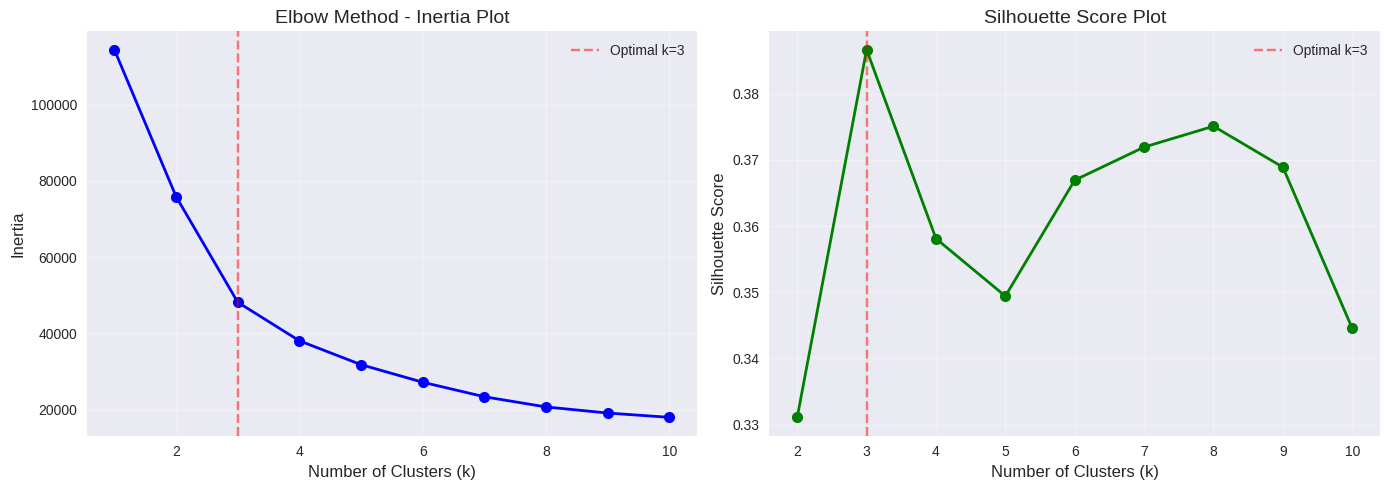


Silhouette Scores for k=2 to k=10:
k=2: 0.3311
k=3: 0.3867
k=4: 0.3581
k=5: 0.3494
k=6: 0.3669
k=7: 0.3719
k=8: 0.3751
k=9: 0.3689
k=10: 0.3445


In [9]:
# Plot Silhouette Scores for different k values
silhouette_scores = []
K_range = range(2, 11)  # Silhouette score requires at least 2 clusters

print("Calculating Silhouette Scores...")
for k in K_range:
    print(f"Computing for k={k}...")
    kmeans_temp = KMeansClustering(n_clusters=k, random_state=42)
    kmeans_temp.fit(X_pca)
    score = silhouette_score(X_pca, kmeans_temp.labels)
    silhouette_scores.append(score)

# Create combined plot: Inertia and Silhouette Score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Inertia plot
ax1.plot(range(1, 11), inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Inertia', fontsize=12)
ax1.set_title('Elbow Method - Inertia Plot', fontsize=14)
ax1.axvline(x=3, color='r', linestyle='--', alpha=0.5, label='Optimal k=3')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Silhouette score plot
ax2.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score Plot', fontsize=14)
ax2.axvline(x=3, color='r', linestyle='--', alpha=0.5, label='Optimal k=3')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print(f"\nSilhouette Scores for k=2 to k=10:")
for k, score in zip(K_range, silhouette_scores):
    print(f"k={k}: {score:.4f}")

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

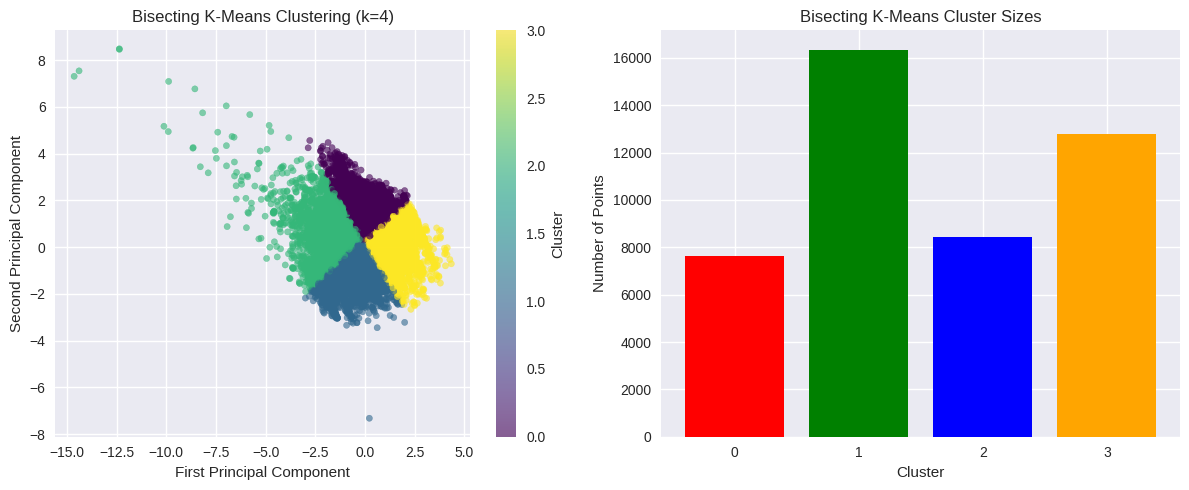

Bisecting K-Means Silhouette Score: 0.3602
Number of splits performed: 2
Cluster sizes: [np.int64(7639), np.int64(16348), np.int64(8429), np.int64(12795)]


In [7]:
class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_`
        - Set and return `self.labels_` (numpy array of length n_samples)

        Hints:
        - Use sklearn.cluster.KMeans(n_clusters=2, random_state=self.random_state) for the split step
        - Keep a counter for new label ids and increment when creating a new cluster
        - Use boolean indexing to operate on subsets of X efficiently
        """
        from sklearn.cluster import KMeans
        
        # Start with all points in cluster 0
        self.labels_ = np.zeros(X.shape[0], dtype=int)
        next_label = 1  # Next available cluster label
        
        # Keep splitting until we reach desired number of clusters
        while len(np.unique(self.labels_)) < self.n_clusters:
            # Find the largest cluster to split
            unique_labels, counts = np.unique(self.labels_, return_counts=True)
            largest_cluster = unique_labels[np.argmax(counts)]
            
            # Get points in the largest cluster
            cluster_mask = self.labels_ == largest_cluster
            cluster_points = X[cluster_mask]
            
            # Split this cluster into 2 using KMeans
            kmeans = KMeans(n_clusters=2, random_state=self.random_state, n_init=10)
            sub_labels = kmeans.fit_predict(cluster_points)
            
            # Assign new labels
            # Points with sub_label 0 keep the original label
            # Points with sub_label 1 get a new label
            new_labels = self.labels_.copy()
            cluster_indices = np.where(cluster_mask)[0]
            
            for i, sub_label in enumerate(sub_labels):
                if sub_label == 1:
                    new_labels[cluster_indices[i]] = next_label
            
            # Store split information
            self.split_tree[largest_cluster] = (largest_cluster, next_label)
            self.centers_[largest_cluster] = kmeans.cluster_centers_[0]
            self.centers_[next_label] = kmeans.cluster_centers_[1]
            
            self.labels_ = new_labels
            next_label += 1
        
        return self.labels_

# Example usage and visualization
bisect = BisectingKMeans(n_clusters=4, random_state=42)
labels = bisect.fit_predict(X_pca)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', alpha=0.6, s=20)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Bisecting K-Means Clustering (k=4)')
plt.colorbar(label='Cluster')

plt.subplot(1, 2, 2)
cluster_sizes = [np.sum(labels == i) for i in range(4)]
plt.bar(range(4), cluster_sizes, color=['red', 'green', 'blue', 'orange'])
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.title('Bisecting K-Means Cluster Sizes')
plt.xticks(range(4))

plt.tight_layout()
plt.show()

print(f"Bisecting K-Means Silhouette Score: {silhouette_score(X_pca, labels):.4f}")
print(f"Number of splits performed: {len(bisect.split_tree)}")
print(f"Cluster sizes: {cluster_sizes}")

## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!